In [1]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot

import warnings
warnings.filterwarnings('ignore')

vapeplot.set_palette('avanti')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [2]:
path_data = "../../training_results/single/ml_classic/"
list_documents = os.listdir(path_data)

In [3]:
list_df = []

for element in list_documents:
    df_data = pd.read_csv(f"{path_data}{element}")

    name_values = element.split("_exploring")[0]
    df_data['encoder'] = name_values

    list_df.append(df_data)

df_results = pd.concat(list_df, axis=0)
df_results

,description,test_accuracy,test_f1_score,test_precision,test_recall,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,SVC,0.919255,0.919392,0.928128,0.919255,0.020122,0.017148,0.878463,0.880000,0.890736,0.880000,77,prottrans_t5bdf
1,KNeighborsClassifier,0.850932,0.850932,0.850932,0.850932,0.008043,0.019472,0.871685,0.872000,0.874195,0.872000,77,prottrans_t5bdf
2,GaussianProcessClassifier,0.894410,0.894589,0.903135,0.894410,0.078575,0.025262,0.870250,0.872000,0.885414,0.872000,77,prottrans_t5bdf
3,GaussianNB,0.832298,0.831105,0.865105,0.832298,0.009130,0.010406,0.816779,0.821333,0.846689,0.821333,77,prottrans_t5bdf
4,DecisionTreeClassifier,0.776398,0.776623,0.777089,0.776398,0.132023,0.009690,0.815788,0.816000,0.817480,0.816000,77,prottrans_t5bdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,BaggingClassifier,0.795031,0.794746,0.799459,0.795031,0.110685,0.006163,0.803589,0.805333,0.814698,0.805333,63,bepler
6,RandomForestClassifier,0.850932,0.850794,0.854876,0.850932,0.187180,0.012204,0.839296,0.840000,0.845526,0.840000,63,bepler
7,ExtraTreesClassifier,0.863354,0.863227,0.867383,0.863354,0.098718,0.012380,0.831177,0.832000,0.838325,0.832000,63,bepler
8,AdaBoostClassifier,0.863354,0.863322,0.865693,0.863354,0.227313,0.010535,0.839141,0.840000,0.847669,0.840000,63,bepler


In [4]:
df_results_train = df_results[['description', 'train_f1_weighted',
       'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
       'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_test = df_results[['description', 'test_accuracy', 'test_f1_score', 'test_precision',
       'test_recall', 'iteration', 'encoder']]

df_results_test.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "Iteration", "Encoder"]
df_results_test['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_test], axis=0)
df_concat

,Algorithm,F1,Recall,Precision,Accuracy,Iteration,Encoder,Stage
0,SVC,0.878463,0.880000,0.890736,0.880000,77,prottrans_t5bdf,Training
1,KNeighborsClassifier,0.871685,0.872000,0.874195,0.872000,77,prottrans_t5bdf,Training
2,GaussianProcessClassifier,0.870250,0.872000,0.885414,0.872000,77,prottrans_t5bdf,Training
3,GaussianNB,0.816779,0.821333,0.846689,0.821333,77,prottrans_t5bdf,Training
4,DecisionTreeClassifier,0.815788,0.816000,0.817480,0.816000,77,prottrans_t5bdf,Training
...,...,...,...,...,...,...,...,...
5,BaggingClassifier,0.794746,0.795031,0.799459,0.795031,63,bepler,Validating
6,RandomForestClassifier,0.850794,0.850932,0.854876,0.850932,63,bepler,Validating
7,ExtraTreesClassifier,0.863227,0.863354,0.867383,0.863354,63,bepler,Validating
8,AdaBoostClassifier,0.863322,0.863354,0.865693,0.863354,63,bepler,Validating


In [5]:
df_concat.describe()

,F1,Recall,Precision,Accuracy,Iteration
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,0.822362,0.823727,0.832796,0.823727,49.500000
std,0.062004,0.060702,0.059419,0.060702,28.866521
min,0.411948,0.490683,0.562357,0.490683,0.000000
25%,0.782625,0.784000,0.793505,0.784000,24.750000
50%,0.830585,0.832000,0.841895,0.832000,49.500000
75%,0.869686,0.869565,0.879084,0.869565,74.250000
max,0.962690,0.962733,0.965333,0.962733,99.000000


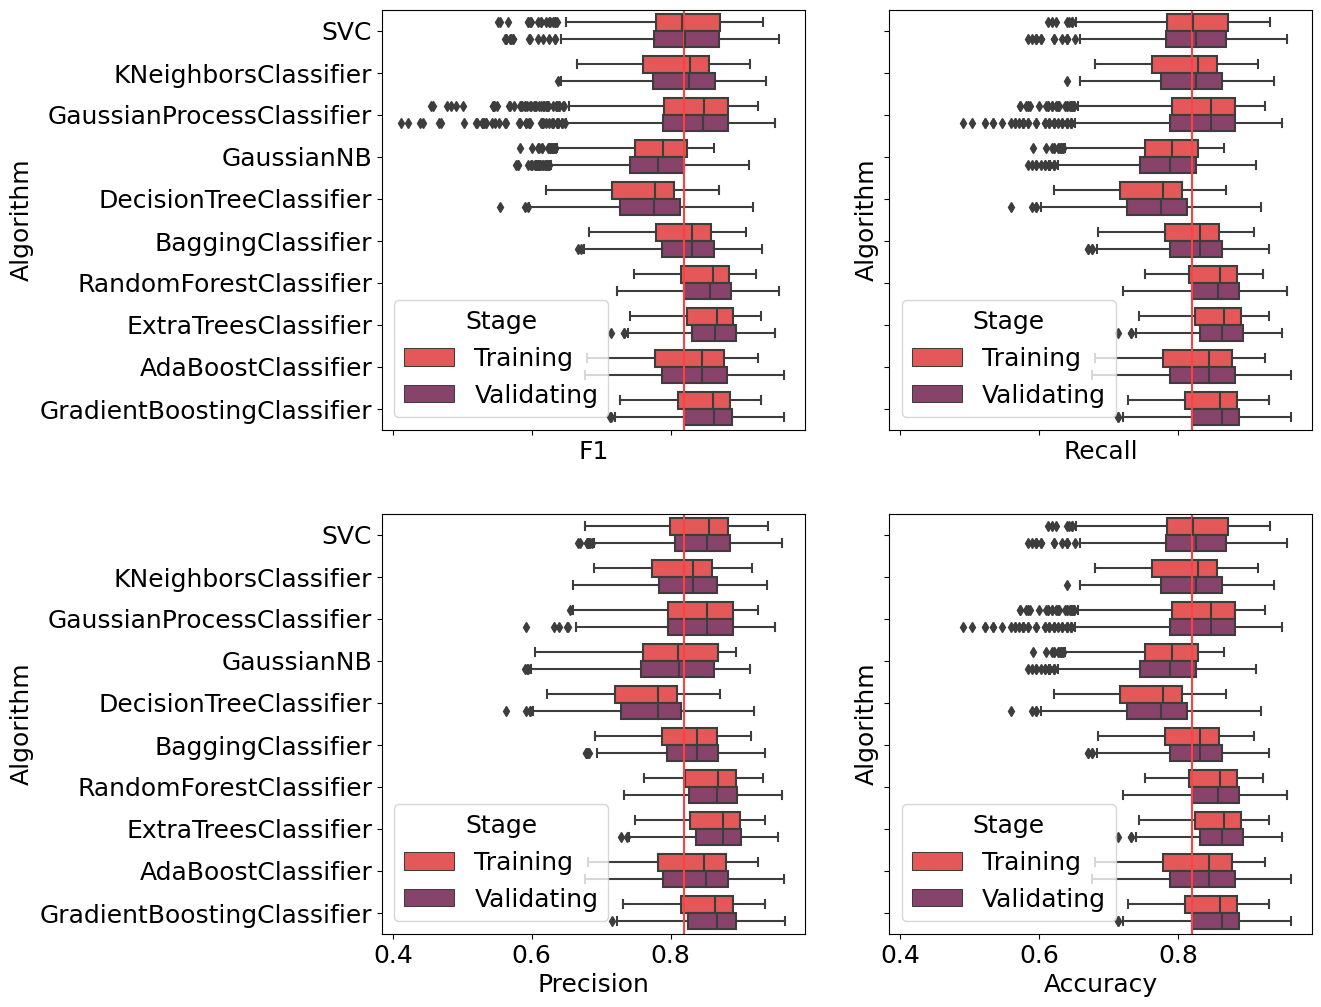

In [6]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)

ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")

ax1.axvline(x = 0.82,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")

ax2.axvline(x = 0.82,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")

ax3.axvline(x = 0.82,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

ax4.axvline(x = 0.82,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

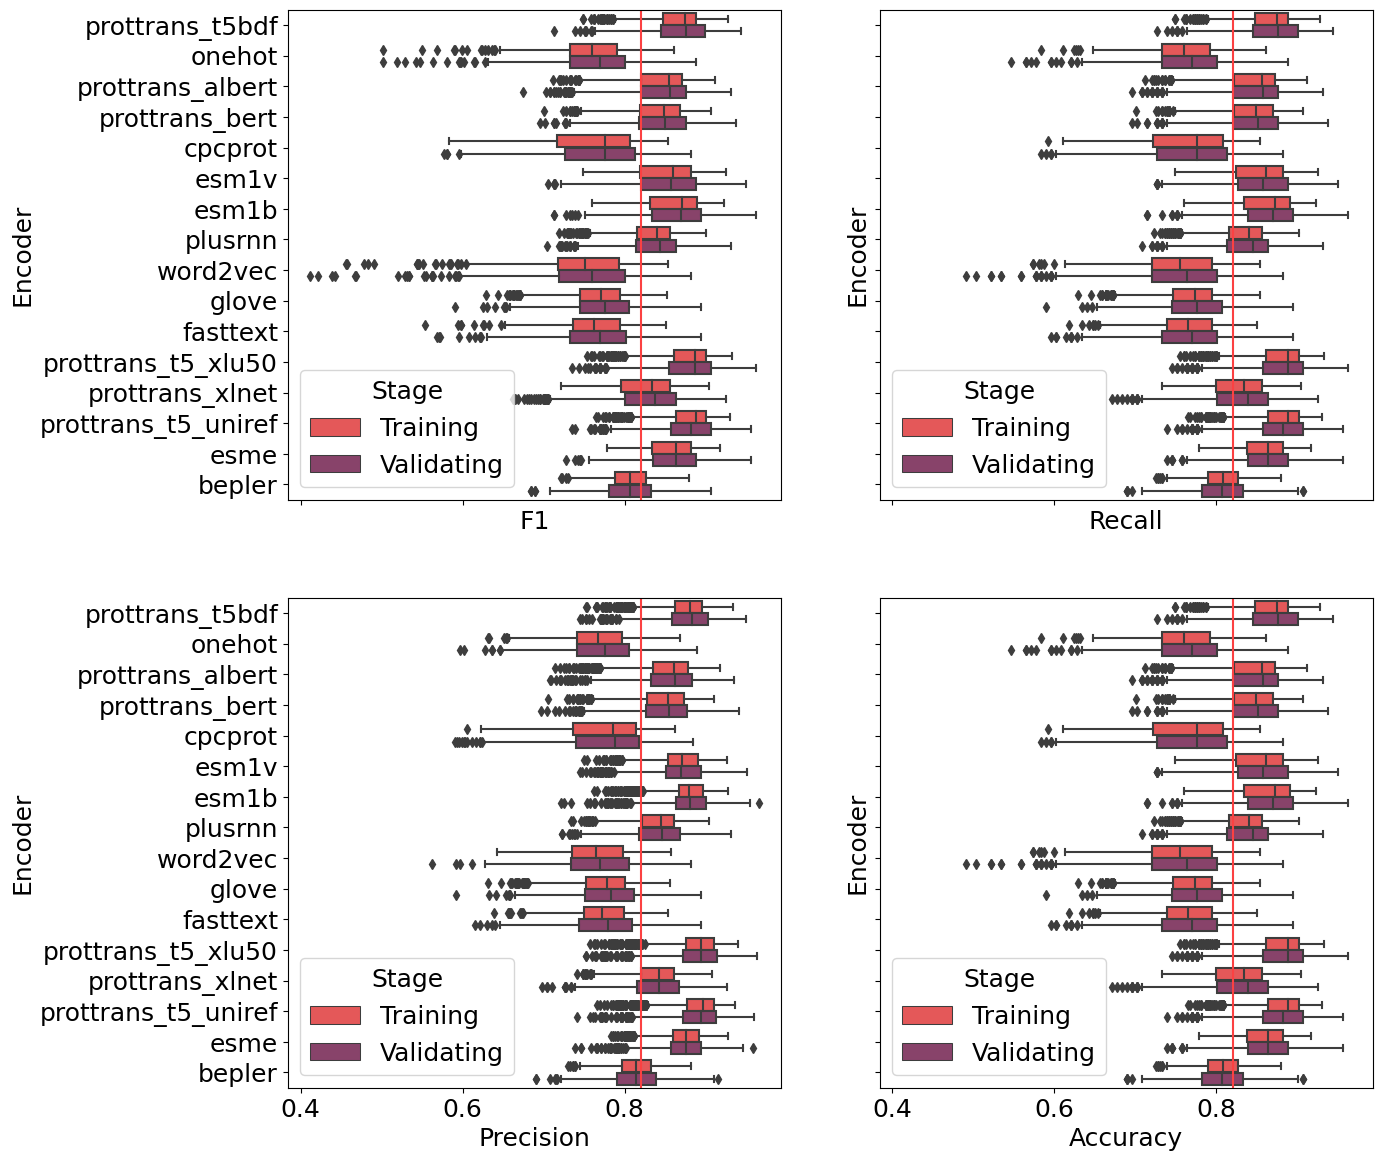

In [7]:
fig, axes = plt.subplots(2,2, figsize=(14,14), sharex=True, sharey=True)

ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

ax1.axvline(x = 0.82,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax2.axvline(x = 0.82,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax3.axvline(x = 0.82,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax4.axvline(x = 0.82,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

In [8]:
std_grouped_data_training = df_results_train[["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]].groupby(by=["Algorithm", "Encoder"]).std()
std_grouped_data_testing = df_results_test[["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]].groupby(by=["Algorithm", "Encoder"]).std()


In [9]:
import numpy as np

filter_std_accuracy_training = np.quantile(std_grouped_data_training['Accuracy'], .1)
filter_std_precision_training = np.quantile(std_grouped_data_training['Precision'], .1)
filter_std_recall_training = np.quantile(std_grouped_data_training['Recall'], .1)
filter_std_f_score_training = np.quantile(std_grouped_data_training['F1'], .1)

filter_std_accuracy_testing = np.quantile(std_grouped_data_testing['Accuracy'], .1)
filter_std_precision_testing = np.quantile(std_grouped_data_testing['Precision'], .1)
filter_std_recall_testing = np.quantile(std_grouped_data_testing['Recall'], .1)
filter_std_f_score_testing = np.quantile(std_grouped_data_testing['F1'], .1)

In [10]:
std_grouped_data_training["Accuray_cat_std"] = (std_grouped_data_training["Accuracy"] <= filter_std_accuracy_training).astype(int)
std_grouped_data_training["Precision_cat_std"] = (std_grouped_data_training["Precision"] <= filter_std_precision_training).astype(int)
std_grouped_data_training["Recall_cat_std"] = (std_grouped_data_training["Recall"] <= filter_std_recall_training).astype(int)
std_grouped_data_training["F-score_cat_std"] = (std_grouped_data_training["F1"] <= filter_std_f_score_training).astype(int)

std_grouped_data_testing["Accuray_cat_std"] = (std_grouped_data_testing["Accuracy"] <= filter_std_accuracy_testing).astype(int)
std_grouped_data_testing["Precision_cat_std"] = (std_grouped_data_testing["Precision"] <= filter_std_precision_testing).astype(int)
std_grouped_data_testing["Recall_cat_std"] = (std_grouped_data_testing["Recall"] <= filter_std_recall_testing).astype(int)
std_grouped_data_testing["F-score_cat_std"] = (std_grouped_data_testing["F1"] <= filter_std_f_score_testing).astype(int)


In [11]:
mean_grouped_data_training = df_results_train[["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]].groupby(by=["Algorithm", "Encoder"]).mean()
mean_grouped_data_testing = df_results_test[["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]].groupby(by=["Algorithm", "Encoder"]).mean()

filter_mean_accuracy_training = np.quantile(mean_grouped_data_training['Accuracy'], .9)
filter_mean_precision_training = np.quantile(mean_grouped_data_training['Precision'], .9)
filter_mean_recall_training = np.quantile(mean_grouped_data_training['Recall'], .9)
filter_mean_f_score_training = np.quantile(mean_grouped_data_training['F1'], .9)

filter_mean_accuracy_testing = np.quantile(mean_grouped_data_testing['Accuracy'], .9)
filter_mean_precision_testing = np.quantile(mean_grouped_data_testing['Precision'], .9)
filter_mean_recall_testing = np.quantile(mean_grouped_data_testing['Recall'], .9)
filter_mean_f_score_testing = np.quantile(mean_grouped_data_testing['F1'], .9)

mean_grouped_data_training["Accuray_cat_mean"] = (mean_grouped_data_training["Accuracy"] >= filter_mean_accuracy_training).astype(int)
mean_grouped_data_training["Precision_cat_mean"] = (mean_grouped_data_training["Precision"] >= filter_mean_precision_training).astype(int)
mean_grouped_data_training["Recall_cat_mean"] = (mean_grouped_data_training["Recall"] >= filter_mean_recall_training).astype(int)
mean_grouped_data_training["F-score_cat_mean"] = (mean_grouped_data_training["F1"] >= filter_mean_f_score_training).astype(int)

mean_grouped_data_testing["Accuray_cat_mean"] = (mean_grouped_data_testing["Accuracy"] >= filter_mean_accuracy_testing).astype(int)
mean_grouped_data_testing["Precision_cat_mean"] = (mean_grouped_data_testing["Precision"] >= filter_mean_precision_testing).astype(int)
mean_grouped_data_testing["Recall_cat_mean"] = (mean_grouped_data_testing["Recall"] >= filter_mean_recall_testing).astype(int)
mean_grouped_data_testing["F-score_cat_mean"] = (mean_grouped_data_testing["F1"] >= filter_mean_f_score_testing).astype(int)


In [12]:
matrix_data = []

for index in mean_grouped_data_training.index:
    algorithm = index[0]
    encoding = index[1]

    accuracy_value = mean_grouped_data_training['Accuray_cat_mean'][index]
    f_score_value = mean_grouped_data_training['F-score_cat_mean'][index]
    precision_value = mean_grouped_data_training['Precision_cat_mean'][index]
    recall_value = mean_grouped_data_training['Recall_cat_mean'][index]
    
    row = [algorithm, encoding, accuracy_value, f_score_value, precision_value, recall_value]
    matrix_data.append(row)

df_process_mean_training = pd.DataFrame(matrix_data, columns=["Algorithm", "Encoder", "mean_accuracy_training", "mean_f_score_training", "mean_precision_training", "mean_recall_training"])
df_process_mean_training

,Algorithm,Encoder,mean_accuracy_training,mean_f_score_training,mean_precision_training,mean_recall_training
0,AdaBoostClassifier,bepler,0,0,0,0
1,AdaBoostClassifier,cpcprot,0,0,0,0
2,AdaBoostClassifier,esm1b,0,0,0,0
3,AdaBoostClassifier,esm1v,0,0,0,0
4,AdaBoostClassifier,esme,0,0,0,0
...,...,...,...,...,...,...
155,SVC,prottrans_t5_uniref,1,1,1,1
156,SVC,prottrans_t5_xlu50,1,1,1,1
157,SVC,prottrans_t5bdf,1,1,1,1
158,SVC,prottrans_xlnet,0,0,0,0


In [13]:
matrix_data = []

for index in mean_grouped_data_testing.index:
    algorithm = index[0]
    encoding = index[1]

    accuracy_value = mean_grouped_data_testing['Accuray_cat_mean'][index]
    f_score_value = mean_grouped_data_testing['F-score_cat_mean'][index]
    precision_value = mean_grouped_data_testing['Precision_cat_mean'][index]
    recall_value = mean_grouped_data_testing['Recall_cat_mean'][index]
    
    row = [algorithm, encoding, accuracy_value, f_score_value, precision_value, recall_value]
    matrix_data.append(row)

df_process_mean_testing = pd.DataFrame(matrix_data, columns=["Algorithm", "Encoder", "mean_accuracy_testing", "mean_f_score_testing", "mean_precision_testing", "mean_recall_testing"])
df_process_mean_testing

,Algorithm,Encoder,mean_accuracy_testing,mean_f_score_testing,mean_precision_testing,mean_recall_testing
0,AdaBoostClassifier,bepler,0,0,0,0
1,AdaBoostClassifier,cpcprot,0,0,0,0
2,AdaBoostClassifier,esm1b,0,0,0,0
3,AdaBoostClassifier,esm1v,0,0,0,0
4,AdaBoostClassifier,esme,0,0,0,0
...,...,...,...,...,...,...
155,SVC,prottrans_t5_uniref,1,1,1,1
156,SVC,prottrans_t5_xlu50,1,1,1,1
157,SVC,prottrans_t5bdf,1,1,1,1
158,SVC,prottrans_xlnet,0,0,0,0


In [14]:
matrix_data = []

for index in std_grouped_data_training.index:
    algorithm = index[0]
    encoding = index[1]

    accuracy_value = std_grouped_data_training['Accuray_cat_std'][index]
    f_score_value = std_grouped_data_training['F-score_cat_std'][index]
    precision_value = std_grouped_data_training['Precision_cat_std'][index]
    recall_value = std_grouped_data_training['Recall_cat_std'][index]
    
    row = [algorithm, encoding, accuracy_value, f_score_value, precision_value, recall_value]
    matrix_data.append(row)

df_process_std_training = pd.DataFrame(matrix_data, columns=["Algorithm", "Encoder", "std_accuracy_training", "std_f_score_training", "std_precision_training", "std_recall_training"])
df_process_std_training

,Algorithm,Encoder,std_accuracy_training,std_f_score_training,std_precision_training,std_recall_training
0,AdaBoostClassifier,bepler,0,0,0,0
1,AdaBoostClassifier,cpcprot,0,0,0,0
2,AdaBoostClassifier,esm1b,0,0,0,0
3,AdaBoostClassifier,esm1v,0,0,0,0
4,AdaBoostClassifier,esme,0,0,0,0
...,...,...,...,...,...,...
155,SVC,prottrans_t5_uniref,1,1,1,1
156,SVC,prottrans_t5_xlu50,1,1,1,1
157,SVC,prottrans_t5bdf,0,0,0,0
158,SVC,prottrans_xlnet,0,0,0,0


In [15]:
matrix_data = []

for index in std_grouped_data_testing.index:
    algorithm = index[0]
    encoding = index[1]

    accuracy_value = std_grouped_data_testing['Accuray_cat_std'][index]
    f_score_value = std_grouped_data_testing['F-score_cat_std'][index]
    precision_value = std_grouped_data_testing['Precision_cat_std'][index]
    recall_value = std_grouped_data_testing['Recall_cat_std'][index]
    
    row = [algorithm, encoding, accuracy_value, f_score_value, precision_value, recall_value]
    matrix_data.append(row)

df_process_std_testing = pd.DataFrame(matrix_data, columns=["Algorithm", "Encoder", "std_accuracy_testing", "std_f_score_testing", "std_precision_testing", "std_recall_testing"])
df_process_std_testing

,Algorithm,Encoder,std_accuracy_testing,std_f_score_testing,std_precision_testing,std_recall_testing
0,AdaBoostClassifier,bepler,0,0,0,0
1,AdaBoostClassifier,cpcprot,0,0,0,0
2,AdaBoostClassifier,esm1b,0,1,0,0
3,AdaBoostClassifier,esm1v,0,0,0,0
4,AdaBoostClassifier,esme,0,0,0,0
...,...,...,...,...,...,...
155,SVC,prottrans_t5_uniref,0,0,0,0
156,SVC,prottrans_t5_xlu50,1,1,0,1
157,SVC,prottrans_t5bdf,1,1,0,1
158,SVC,prottrans_xlnet,0,0,0,0


In [16]:
df_merge = df_process_mean_training.merge(right=df_process_mean_testing, on=["Algorithm", "Encoder"])
df_merge = df_merge.merge(right=df_process_std_testing, on=["Algorithm", "Encoder"])
df_merge = df_merge.merge(right=df_process_std_training, on=["Algorithm", "Encoder"])
df_merge


,Algorithm,Encoder,mean_accuracy_training,mean_f_score_training,mean_precision_training,mean_recall_training,mean_accuracy_testing,mean_f_score_testing,mean_precision_testing,mean_recall_testing,std_accuracy_testing,std_f_score_testing,std_precision_testing,std_recall_testing,std_accuracy_training,std_f_score_training,std_precision_training,std_recall_training
0,AdaBoostClassifier,bepler,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AdaBoostClassifier,cpcprot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AdaBoostClassifier,esm1b,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,AdaBoostClassifier,esm1v,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,AdaBoostClassifier,esme,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,SVC,prottrans_t5_uniref,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1
156,SVC,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
157,SVC,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0
158,SVC,prottrans_xlnet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df_merge['Voting'] = df_merge.sum(axis=1, numeric_only=True)
df_merge.sort_values(by="Voting", ascending=False)

,Algorithm,Encoder,mean_accuracy_training,mean_f_score_training,mean_precision_training,mean_recall_training,mean_accuracy_testing,mean_f_score_testing,mean_precision_testing,mean_recall_testing,std_accuracy_testing,std_f_score_testing,std_precision_testing,std_recall_testing,std_accuracy_training,std_f_score_training,std_precision_training,std_recall_training,Voting
59,ExtraTreesClassifier,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
156,SVC,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,15
60,ExtraTreesClassifier,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,15
92,GaussianProcessClassifier,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,13
140,RandomForestClassifier,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,ExtraTreesClassifier,onehot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56,ExtraTreesClassifier,plusrnn,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57,ExtraTreesClassifier,prottrans_albert,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58,ExtraTreesClassifier,prottrans_bert,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_merge[df_merge['Voting']>12]

,Algorithm,Encoder,mean_accuracy_training,mean_f_score_training,mean_precision_training,mean_recall_training,mean_accuracy_testing,mean_f_score_testing,mean_precision_testing,mean_recall_testing,std_accuracy_testing,std_f_score_testing,std_precision_testing,std_recall_testing,std_accuracy_training,std_f_score_training,std_precision_training,std_recall_training,Voting
59,ExtraTreesClassifier,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
60,ExtraTreesClassifier,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,15
92,GaussianProcessClassifier,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,13
156,SVC,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,15
